In [3]:
AIEEE = "/home/souvic/mounted/btp/ndata/extracted/Merged/"
OAIEEE_2004 = AIEEE+"AIEEE/aieee_2004.csv"
OAIEEE_2005 = AIEEE+"AIEEE/aieee_2005.csv"
OAIEEE_2006 = AIEEE+"AIEEE/aieee_2006.csv"
OAIEEE_2007 = AIEEE+"AIEEE/aieee_2007.csv"
OAIEEE_2008 = AIEEE+"AIEEE/aieee_2008.csv"
OAIEEE_2009 = AIEEE+"AIEEE/aieee_2009.csv"
OAIEEE_2010 = AIEEE+"AIEEE/aieee_2010.csv"
OAIEEE_2011 = AIEEE+"AIEEE/aieee_2011.csv"
OAL = [OAIEEE_2004, OAIEEE_2005, OAIEEE_2006, OAIEEE_2007, OAIEEE_2008, OAIEEE_2009, OAIEEE_2010, OAIEEE_2011]
year = ['2004','2005','2006','2007','2008','2009','2010','2011']

In [18]:
import numpy as np
import pandas as pd

df  = pd.read_csv(OAIEEE_2011)
df['air_btech'] = [str(elem).replace('------\xa0', '') for elem in df['air_btech']]
df['air_btech'] = [str(elem).replace('nan', '') for elem in df['air_btech']]
df['air_btech'] = df.air_btech.replace('', np.NaN)
df = df[df['air_btech'].notna()]
df['air_btech'] = [int(elem) for elem in df['air_btech']]

In [19]:
df = df.sort_values(by='air_btech')
df = df.reset_index(drop=True)

In [5]:
top1 = df[:115]
top100 = df[:1150]
gtop1 = top1[top1['category']=='GEN']
gtop100 = top100[top100['category']=='GEN']

In [6]:
print(pd.Series(list(gtop1.index)).median())
print(pd.Series(list(gtop100.index)).median())

58.0
548.0


In [7]:
generals = df[df['category']=='GEN']

In [8]:
pd.Series(list(generals.index)).median()

52212.0

In [9]:
generals.shape

(61755, 20)

In [10]:
df.shape

(115516, 20)

In [11]:
top1 = df[:115]
top100 = df[:1150]
wtop1 = top1[top1['Gender']==1]
wtop100 = top100[top100['Gender']==1]
w = df[df['Gender']==1]

In [12]:
print(w.shape)
print(wtop1.shape)
print(wtop100.shape)

(29502, 20)
(17, 20)
(192, 20)


In [13]:
print(pd.Series(list(wtop1.index)).median())
print(pd.Series(list(wtop100.index)).median())
print(pd.Series(list(w.index)).median())


52.0
558.5
58960.5


In [14]:
#  52/115 = 45.22%
#  558.5/1150 = 48.56%
#  

In [15]:
df[df['Gender']==0].shape

(86014, 20)

In [17]:
set(df['category'])

{'GEN', 'GENSub-PH', 'OBC', 'OBCSub-PH', 'SC', 'SCSub-PH', 'ST', 'STSub-PH'}

In [30]:
category = ['GEN','OBC','SC','ST']
top1 = df[:115]
top100 = df[:1150]

for cat in category:
    print(cat,"+", cat+"Sub-PH")
    cat_df = df[(df['category']==cat) | (df['category']==cat+"Sub-PH")]
    print("Number of Students: ", cat_df.shape[0])
    ctop1 = top1[(top1['category']==cat) | (top1['category']==cat+"Sub-PH")]
    ctop100 = top100[(top100['category']==cat) | (top100['category']==cat+"Sub-PH")]
    print(f"Median rank of {cat} : {pd.Series(list(cat_df.index)).median()} ")
    print(f"Median rank of {cat} in Top 1% Students: {pd.Series(list(ctop1.index)).median()} (Number : {ctop1.shape[0]})")
    print(f"Median rank of {cat} in Top 10% Students: {pd.Series(list(ctop100.index)).median()} (Number: {ctop100.shape[0]})")
    print("_"*30)    

GEN + GENSub-PH
Number of Students:  62059
Median rank of GEN : 52248.0 
Median rank of GEN in Top 1% Students: 58.0 (Number : 107)
Median rank of GEN in Top 10% Students: 549.5 (Number: 964)
______________________________
OBC + OBCSub-PH
Number of Students:  38587
Median rank of OBC : 61033.0 
Median rank of OBC in Top 1% Students: 51.0 (Number : 8)
Median rank of OBC in Top 10% Students: 704.0 (Number: 171)
______________________________
SC + SCSub-PH
Number of Students:  10787
Median rank of SC : 69365.0 
Median rank of SC in Top 1% Students: nan (Number : 0)
Median rank of SC in Top 10% Students: 632.0 (Number: 11)
______________________________
ST + STSub-PH
Number of Students:  4083
Median rank of ST : 71419.0 
Median rank of ST in Top 1% Students: nan (Number : 0)
Median rank of ST in Top 10% Students: 930.0 (Number: 4)
______________________________


/tmp/ipykernel_20431/1514370459.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  print(f"Median rank of {cat} in Top 1% Students: {pd.Series(list(ctop1.index)).median()} (Number : {ctop1.shape[0]})")
/tmp/ipykernel_20431/1514370459.py:12: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  print(f"Median rank of {cat} in Top 1% Students: {pd.Series(list(ctop1.index)).median()} (Number : {ctop1.shape[0]})")


In [ ]:
# category = ['GEN','OBC','SC','ST']
gender = [0, 1]
top1 = df[:115]
top100 = df[:1150]

for g in gender:
    if g == 0:
        cat = "Male"
    else:
        cat = "Female"
    print(cat)
    cat_df = df[(df['Gender']==g)]
    print("Number of Students: ", cat_df.shape[0])
    ctop1 = top1[(top1['Gender']==g)]
    ctop100 = top100[top100['Gender']==g]
    print(f"Median rank of {cat} : {pd.Series(list(cat_df.index)).median()}")
    print(f"Median rank of {cat} in Top 1% Students: {pd.Series(list(ctop1.index)).median()} (Number : {ctop1.shape[0]})")
    print(f"Median rank of {cat} in Top 10% Students: {pd.Series(list(ctop100.index)).median()} (Number: {ctop100.shape[0]})")
    print("_"*30) 

In [57]:
import numpy as np
import pandas as pd

def preprocess_df(df):
    df['air_btech'] = [str(elem).replace('\xa0', '') for elem in df['air_btech']]
    df['air_btech'] = [str(elem).replace('------', '') for elem in df['air_btech']]
    df['air_btech'] = [str(elem).replace('*', '') for elem in df['air_btech']]
    df['air_btech'] = [str(elem).replace('&', '') for elem in df['air_btech']]
    df['air_btech'] = [str(elem).replace('+', '') for elem in df['air_btech']]
    df['air_btech'] = [str(elem).replace('#', '') for elem in df['air_btech']]
    df['air_btech'] = [str(elem).replace('@', '') for elem in df['air_btech']]
    df['air_btech'] = [str(elem).replace('$', '') for elem in df['air_btech']]
    df['air_btech'] = [str(elem).replace('=', '') for elem in df['air_btech']]
    df['air_btech'] = [str(elem).replace('-', '') for elem in df['air_btech']]
    df['air_btech'] = [str(elem).replace('%', '') for elem in df['air_btech']]
    df['air_btech'] = [str(elem).replace('{', '') for elem in df['air_btech']]
    df['air_btech'] = [str(elem).replace('}', '') for elem in df['air_btech']]
    df['air_btech'] = [str(elem).replace('~', '') for elem in df['air_btech']]
    df['air_btech'] = [str(elem).replace('>', '') for elem in df['air_btech']]

    df['air_btech'] = [str(elem).replace('nan', '') for elem in df['air_btech']]
    df['air_btech'] = [str(elem).strip() for elem in df['air_btech']]
                                                                 
    df['air_btech'] = df.air_btech.replace('', np.NaN)
#     df['air_btech'] = pd.to_numeric(df['air_btech'], errors='coerce')
    df = df[df['air_btech'].notna()]
    df['air_btech'] = [int(elem) for elem in df['air_btech']]
    return df

def get_median_percentile(df):
    df = df.sort_values(by='air_btech')
    df = df.reset_index(drop=True)

    # category = ['GEN','OBC','SC','ST']
    gender = [1]
    caste = [1]
    count = int(df.shape[0]*0.01)
    top1 = df[:count]
    top100 = df[:count*10]
#     print(count)
    
    w = []
    r = []

    for g in gender:
        if g == 0:
            cat = "Male"
        else:
            cat = "Female"
        print(cat)
        cat_df = df[(df['Gender']==g)]
        print("Number of Students: ", cat_df.shape[0])
        ctop1 = top1[(top1['Gender']==g)]
        ctop100 = top100[top100['Gender']==g]
        print(f"Median rank of {cat} : {pd.Series(list(cat_df.index)).median()}")
        print(f"Median rank of {cat} in Top 1% Students: {pd.Series(list(ctop1.index)).median()} (Number : {ctop1.shape[0]})")
        print(f"Median rank of {cat} in Top 10% Students: {pd.Series(list(ctop100.index)).median()} (Number: {ctop100.shape[0]})")
        w.append(round(pd.Series(list(cat_df.index)).median() / df.shape[0] * 100 , 2) )
        w.append(round(pd.Series(list(ctop1.index)).median() / top1.shape[0] * 100 , 2))
        w.append(round(pd.Series(list(ctop100.index)).median() / top100.shape[0] * 100 , 2))
        print("_"*30) 
        
    for g in caste:
        if g == 0:
            cat = "General"
        else:
            cat = "Reserved"
        print(cat)
        cat_df = df[(df['Caste']==g)]
        print("Number of Students: ", cat_df.shape[0])
        ctop1 = top1[(top1['Caste']==g)]
        ctop100 = top100[top100['Caste']==g]
        print(f"Median rank of {cat} : {pd.Series(list(cat_df.index)).median()}")
        print(f"Median rank of {cat} in Top 1% Students: {pd.Series(list(ctop1.index)).median()} (Number : {ctop1.shape[0]})")
        print(f"Median rank of {cat} in Top 10% Students: {pd.Series(list(ctop100.index)).median()} (Number: {ctop100.shape[0]})")
        r.append(round(pd.Series(list(cat_df.index)).median() / df.shape[0] * 100 , 2) )
        r.append(round(pd.Series(list(ctop1.index)).median() / top1.shape[0] * 100 , 2))
        r.append(round(pd.Series(list(ctop100.index)).median() / top100.shape[0] * 100 , 2))
        print("_"*30)
    return w, r

In [58]:
import pandas as pd

women_data = []
reserved_data = []

for ai in OAL:
    df = pd.read_csv(ai)
    print(ai)
#     print(df.columns)
    df = preprocess_df(df)
    print(df.shape)
    w,r = get_median_percentile(df)
    women_data.append(w)
    reserved_data.append(r)
    print('_'*30)

/home/souvic/mounted/btp/ndata/extracted/Merged/AIEEE/aieee_2004.csv


/tmp/ipykernel_8618/400951217.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['air_btech'] = [int(elem) for elem in df['air_btech']]


Female
Number of Students:  6521
Median rank of Female : 15384.0
Median rank of Female in Top 1% Students: 149.0 (Number : 41)
Median rank of Female in Top 10% Students: 1707.0 (Number: 535)
______________________________
Reserved
Number of Students:  12314
Median rank of Reserved : 16710.0
Median rank of Reserved in Top 1% Students: 178.0 (Number : 95)
Median rank of Reserved in Top 10% Students: 1617.0 (Number: 959)
______________________________
______________________________
/home/souvic/mounted/btp/ndata/extracted/Merged/AIEEE/aieee_2005.csv


/tmp/ipykernel_8618/400951217.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['air_btech'] = [int(elem) for elem in df['air_btech']]


Female
Number of Students:  9124
Median rank of Female : 21215.5
Median rank of Female in Top 1% Students: 267.5 (Number : 50)
Median rank of Female in Top 10% Students: 2502.0 (Number: 683)
______________________________
Reserved
Number of Students:  17325
Median rank of Reserved : 24342.0
Median rank of Reserved in Top 1% Students: 193.5 (Number : 120)
Median rank of Reserved in Top 10% Students: 2322.5 (Number: 1398)
______________________________
______________________________
/home/souvic/mounted/btp/ndata/extracted/Merged/AIEEE/aieee_2006.csv


/tmp/ipykernel_8618/400951217.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['air_btech'] = [int(elem) for elem in df['air_btech']]


Female
Number of Students:  12214
Median rank of Female : 26392.5
Median rank of Female in Top 1% Students: 266.0 (Number : 67)
Median rank of Female in Top 10% Students: 3137.0 (Number: 976)
______________________________
Reserved
Number of Students:  22147
Median rank of Reserved : 29317.0
Median rank of Reserved in Top 1% Students: 256.0 (Number : 169)
Median rank of Reserved in Top 10% Students: 2860.5 (Number: 1778)
______________________________
______________________________
/home/souvic/mounted/btp/ndata/extracted/Merged/AIEEE/aieee_2007.csv


/tmp/ipykernel_8618/400951217.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['air_btech'] = [int(elem) for elem in df['air_btech']]


Female
Number of Students:  15863
Median rank of Female : 31831.0
Median rank of Female in Top 1% Students: 313.0 (Number : 82)
Median rank of Female in Top 10% Students: 3741.5 (Number: 1206)
______________________________
Reserved
Number of Students:  27061
Median rank of Reserved : 36541.0
Median rank of Reserved in Top 1% Students: 381.0 (Number : 175)
Median rank of Reserved in Top 10% Students: 3545.5 (Number: 2102)
______________________________
______________________________
/home/souvic/mounted/btp/ndata/extracted/Merged/AIEEE/aieee_2008.csv


/tmp/ipykernel_8618/400951217.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['air_btech'] = [int(elem) for elem in df['air_btech']]


Female
Number of Students:  22907
Median rank of Female : 41224.0
Median rank of Female in Top 1% Students: 492.0 (Number : 157)
Median rank of Female in Top 10% Students: 4848.0 (Number: 2109)
______________________________
Reserved
Number of Students:  36539
Median rank of Reserved : 48637.0
Median rank of Reserved in Top 1% Students: 405.0 (Number : 215)
Median rank of Reserved in Top 10% Students: 4710.0 (Number: 2697)
______________________________
______________________________
/home/souvic/mounted/btp/ndata/extracted/Merged/AIEEE/aieee_2009.csv


/tmp/ipykernel_8618/400951217.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['air_btech'] = [int(elem) for elem in df['air_btech']]


Female
Number of Students:  28409
Median rank of Female : 51276.0
Median rank of Female in Top 1% Students: 613.0 (Number : 179)
Median rank of Female in Top 10% Students: 5855.0 (Number: 2543)
______________________________
Reserved
Number of Students:  44895
Median rank of Reserved : 57936.0
Median rank of Reserved in Top 1% Students: 526.0 (Number : 240)
Median rank of Reserved in Top 10% Students: 5748.5 (Number: 3356)
______________________________
______________________________
/home/souvic/mounted/btp/ndata/extracted/Merged/AIEEE/aieee_2010.csv


/tmp/ipykernel_8618/400951217.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['air_btech'] = [int(elem) for elem in df['air_btech']]


Female
Number of Students:  31210
Median rank of Female : 58969.5
Median rank of Female in Top 1% Students: 645.5 (Number : 200)
Median rank of Female in Top 10% Students: 6486.5 (Number: 2636)
______________________________
Reserved
Number of Students:  50115
Median rank of Reserved : 63051.0
Median rank of Reserved in Top 1% Students: 613.5 (Number : 272)
Median rank of Reserved in Top 10% Students: 6307.5 (Number: 3562)
______________________________
______________________________
/home/souvic/mounted/btp/ndata/extracted/Merged/AIEEE/aieee_2011.csv


/tmp/ipykernel_8618/400951217.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['air_btech'] = [int(elem) for elem in df['air_btech']]


Female
Number of Students:  29502
Median rank of Female : 58960.5
Median rank of Female in Top 1% Students: 558.5 (Number : 192)
Median rank of Female in Top 10% Students: 6217.0 (Number: 2442)
______________________________
Reserved
Number of Students:  50883
Median rank of Reserved : 62238.0
Median rank of Reserved in Top 1% Students: 660.0 (Number : 250)
Median rank of Reserved in Top 10% Students: 6345.5 (Number: 3764)
______________________________
______________________________


In [61]:
women_df = pd.DataFrame(women_data, columns=['Total', 'Top1', 'Top100'])

In [62]:
reserved_df = pd.DataFrame(reserved_data, columns=['Total', 'Top1', 'Top100'])

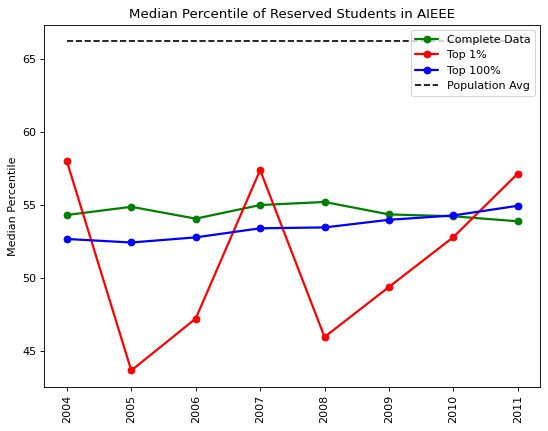

In [65]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
ranges = ['2004','2005','2006','2007','2008','2009','2010','2011']

X_axis = np.arange(len(ranges))

plt.xticks(X_axis, ranges, rotation=90)
# plt.xlabel("Years")
plt.ylabel("Median Percentile")
plt.title("Median Percentile of Reserved Students in AIEEE")

plt.plot(X_axis, reserved_df['Total'], 'g-o', label='Complete Data', linewidth=2, solid_capstyle='round')
plt.plot(X_axis, reserved_df['Top1'], 'r-o', label ='Top 1%', linewidth=2, solid_capstyle='round')
plt.plot(X_axis, reserved_df['Top100'], 'b-o', label = 'Top 100%', linewidth=2, solid_capstyle='round')
plt.plot(X_axis, [66.2]*len(X_axis), '--',label = 'Population Avg', color='black')

plt.legend(loc='upper right')
plt.show()

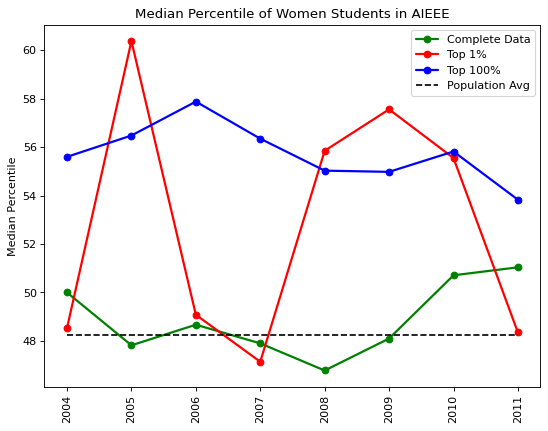

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
ranges = ['2004','2005','2006','2007','2008','2009','2010','2011']

X_axis = np.arange(len(ranges))

plt.xticks(X_axis, ranges, rotation=90)
# plt.xlabel("Years")
plt.ylabel("Median Percentile")
plt.title("Median Percentile of Women Students in AIEEE")

plt.plot(X_axis, women_df['Total'], 'g-o', label='Complete Data', linewidth=2, solid_capstyle='round')
plt.plot(X_axis, women_df['Top1'], 'r-o', label ='Top 1%', linewidth=2, solid_capstyle='round')
plt.plot(X_axis, women_df['Top100'], 'b-o', label = 'Top 100%', linewidth=2, solid_capstyle='round')
plt.plot(X_axis, [48.25]*len(X_axis), '--',label = 'Population Avg', color='black')

plt.legend(loc='upper right')
plt.show()